In [2]:
import pandas as pd
import sklearn
from sklearn import svm,preprocessing
from sklearn.linear_model import LinearRegression



In [3]:
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv(r"/Users/aks/Desktop/aggregate_covid_country.csv")

In [5]:
data.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [6]:
data.tail()

,Date,Country,Confirmed,Recovered,Deaths
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7
23687,2020-05-26,Zimbabwe,56,25,4


In [7]:
data.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [8]:
data.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


In [9]:
data.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [10]:
import seaborn as sns

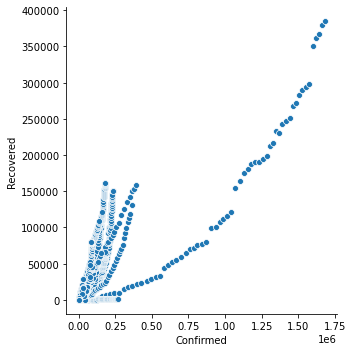

In [11]:
sns.relplot(x="Confirmed",y="Recovered",data=data)

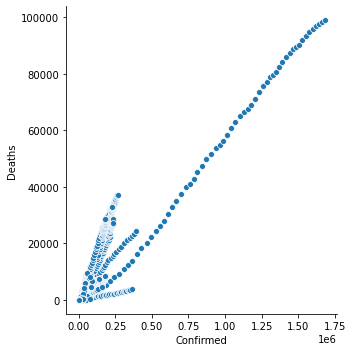

In [12]:
sns.relplot(x="Confirmed",y="Deaths",data=data)

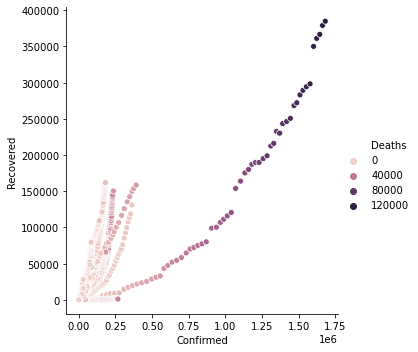

In [13]:
sns.relplot(x="Confirmed",y="Recovered",hue="Deaths",data=data)

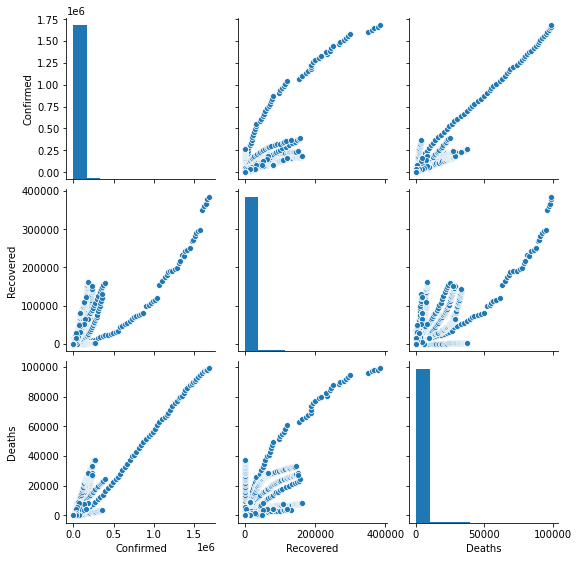

In [14]:
sns.pairplot(data)

In [16]:
data["Country"].value_counts()

Iran                 126
India                126
Japan                126
Papua New Guinea     126
Saint Lucia          126
                    ... 
Laos                 126
Czechia              126
Equatorial Guinea    126
Bahrain              126
Monaco               126
Name: Country, Length: 188, dtype: int64

In [17]:
data.isna().any()

Date         False
Country      False
Confirmed    False
Recovered    False
Deaths       False
dtype: bool

In [18]:
data.isna().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [19]:
india_case=data[data["Country"]=="India"]

In [20]:
india_case.head()

,Date,Country,Confirmed,Recovered,Deaths
79,2020-01-22,India,0,0,0
267,2020-01-23,India,0,0,0
455,2020-01-24,India,0,0,0
643,2020-01-25,India,0,0,0
831,2020-01-26,India,0,0,0


In [21]:
india_case.tail()

,Date,Country,Confirmed,Recovered,Deaths
22827,2020-05-22,India,124794,51824,3726
23015,2020-05-23,India,131423,54385,3868
23203,2020-05-24,India,138536,57692,4024
23391,2020-05-25,India,144950,60706,4172
23579,2020-05-26,India,150793,64277,4344


In [22]:
max_cases_country=india_case.sort_values(by="Confirmed",ascending=False)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
import datetime as dt
india_case['Date']=pd.to_datetime(india_case['Date'])
india_case.head()

<ipython-input-24-e451fa5c5184>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_case['Date']=pd.to_datetime(india_case['Date'])


,Date,Country,Confirmed,Recovered,Deaths
79,2020-01-22,India,0,0,0
267,2020-01-23,India,0,0,0
455,2020-01-24,India,0,0,0
643,2020-01-25,India,0,0,0
831,2020-01-26,India,0,0,0


In [25]:
india_case['Date']=india_case['Date'].map(dt.datetime.toordinal)
india_case.head()

<ipython-input-25-ec8f006aaef6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_case['Date']=india_case['Date'].map(dt.datetime.toordinal)


,Date,Country,Confirmed,Recovered,Deaths
79,737446,India,0,0,0
267,737447,India,0,0,0
455,737448,India,0,0,0
643,737449,India,0,0,0
831,737450,India,0,0,0


In [26]:
x=india_case['Date']
y=india_case['Confirmed']

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [29]:
lr=LinearRegression()

In [32]:
import numpy as np
lr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression()

In [37]:
y_pred=lr.predict(np.array(x_test).reshape(-1,1))

In [33]:
from sklearn.metrics import mean_squared_error

In [38]:
mean_squared_error(x_test,y_pred)

513239617784.57996